In [1]:
#import some necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm 
import matplotlib.pyplot as plt
from scipy import stats
import warnings
%matplotlib inline

def ignore_warn(*args,**kwargs):
    pass
warnings.warn =ignore_warn

pd.set_option('display.float_format', lambda x :'{:.3f}'.format(x))

In [2]:
#import train and test files
df_train = pd.read_csv('housing_train.csv')
df_test = pd.read_csv('housing_test.csv')

In [3]:
#shape of both files
print ('Train Shape =====>  ', df_train.shape)
print ('Test Shape  =====>  ', df_test.shape)

Train Shape =====>   (1460, 81)
Test Shape  =====>   (1459, 80)


We can see Label is taken out from test dataset

In [4]:
#print head for train and test
print ('Train Head')
df_train.head(2)

Train Head


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
print ('Test Head')
df_test.head(2)

Test Head


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [6]:
#Since Id's are of no use for our analysis, so remove them
df_train.drop('Id',axis=1,inplace=True)

In [7]:
df_test.drop('Id',axis=1,inplace=True)

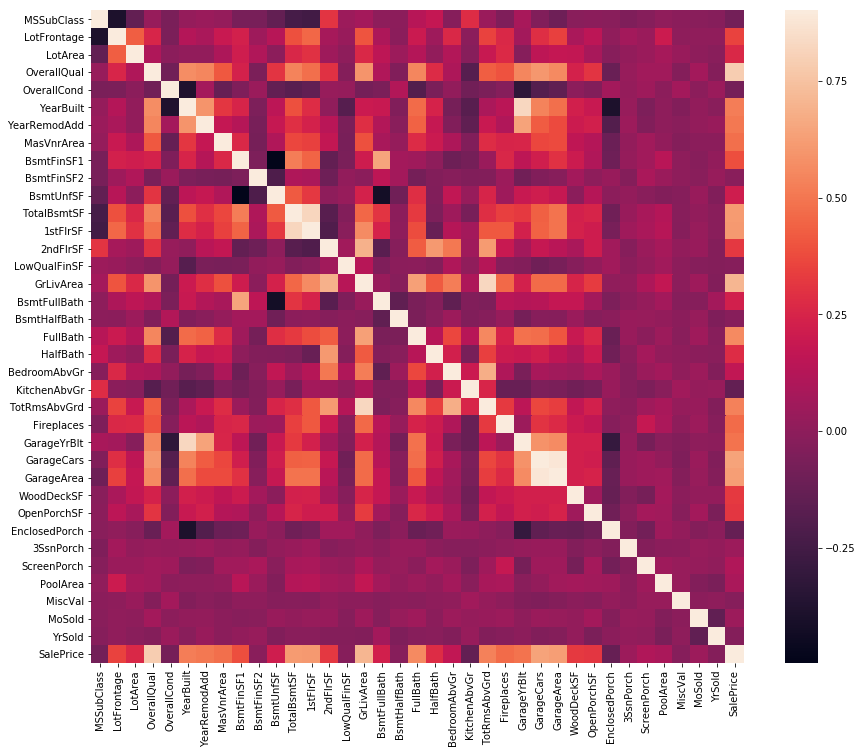

In [8]:
#Generate heat map to see how variables are related to SalesPrice and then will go from there
#light shades indicate they are closely correlated. Pay attention to it.
corr_mat = df_train.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat,vmax=.9,square=True)

Close relation with Saleprice 
                                                                                                 
1.OverallQual                                                                                                 
2.GrLivArea                                                                                                 
3.GarageCars                                                                                                 
4.GarageArea                                                                                                 

Finding outliers in the above classes

Text(0.5,1,'OverallQual vs SalePrice')

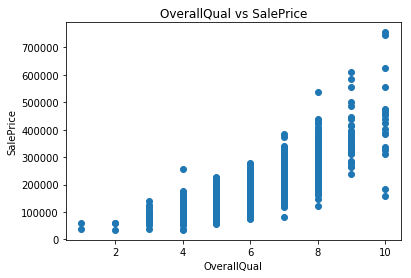

In [9]:
#Time to play with plots to detect any outliers
x = 'OverallQual'
y = 'SalePrice'
z = (x + ' vs ' + y)
fig, ax = plt.subplots()
ax.scatter(x=df_train[x],y=df_train[y])
ax.set_xlabel(x)
ax.set_ylabel (y)
ax.set_title (z)


Text(0.5,1,'GrLivArea vs SalePrice')

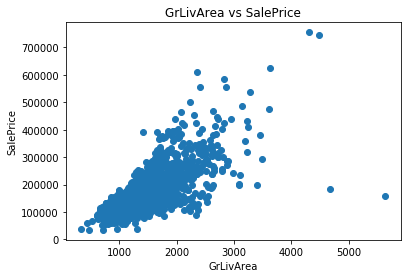

In [10]:
x = 'GrLivArea'
y = 'SalePrice'
z = (x + ' vs ' + y)
fig, ax = plt.subplots()
ax.scatter(x=df_train[x],y=df_train[y])
ax.set_xlabel(x)
ax.set_ylabel (y)
ax.set_title (z)


Text(0.5,1,'GarageCars vs SalePrice')

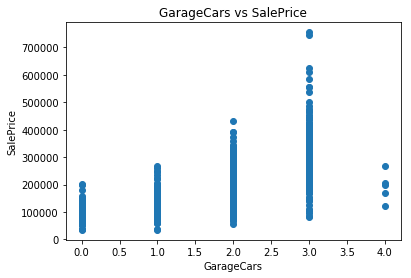

In [11]:
x = 'GarageCars'
y = 'SalePrice'
z = (x + ' vs ' + y)
fig, ax = plt.subplots()
ax.scatter(x=df_train[x],y=df_train[y])
ax.set_xlabel(x)
ax.set_ylabel (y)
ax.set_title (z)

Text(0.5,1,'GarageArea vs SalePrice')

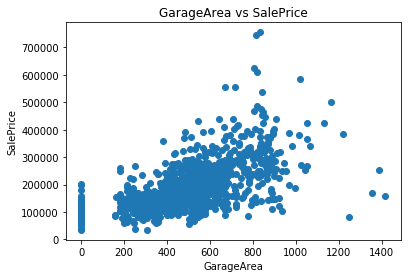

In [12]:
x = 'GarageArea'
y = 'SalePrice'
z = (x + ' vs ' + y)
fig, ax = plt.subplots()
ax.scatter(x=df_train[x],y=df_train[y])
ax.set_xlabel(x)
ax.set_ylabel (y)
ax.set_title (z)

Looking at Overall quality plot we see couple of outliers and also in others as well. Let's fix the Overall quality outliers, hoping others are correlated.

In [13]:
df_train = df_train.drop(df_train[(df_train['OverallQual'] > 9) & (df_train['SalePrice'] < 200000)].index)

Text(0.5,1,'OverallQual vs SalePrice')

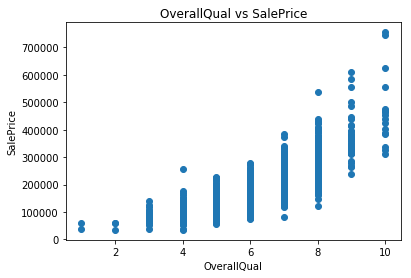

In [14]:
# validate the outlier removel. data points close to 10 on x axis should be removed
x = 'OverallQual'
y = 'SalePrice'
z = (x + ' vs ' + y)
fig, ax = plt.subplots()
ax.scatter(x=df_train[x],y=df_train[y])
ax.set_xlabel(x)
ax.set_ylabel (y)
ax.set_title (z)

Text(0.5,1,'GrLivArea vs SalePrice')

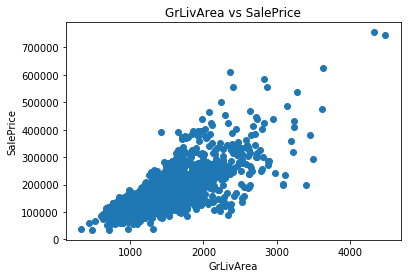

In [15]:
#Lets check if other outliers have been impacted with overall quality outlier removel
x = 'GrLivArea'
y = 'SalePrice'
z = (x + ' vs ' + y)
fig, ax = plt.subplots()
ax.scatter(x=df_train[x],y=df_train[y])
ax.set_xlabel(x)
ax.set_ylabel (y)
ax.set_title (z)

Text(0.5,1,'GarageCars vs SalePrice')

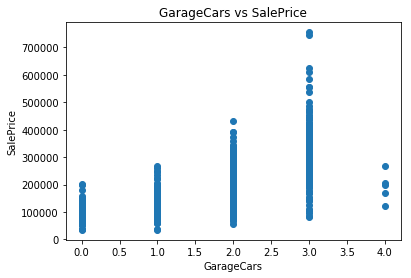

In [16]:
x = 'GarageCars'
y = 'SalePrice'
z = (x + ' vs ' + y)
fig, ax = plt.subplots()
ax.scatter(x=df_train[x],y=df_train[y])
ax.set_xlabel(x)
ax.set_ylabel (y)
ax.set_title (z)

Text(0.5,1,'GarageArea vs SalePrice')

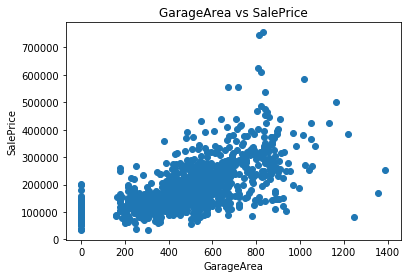

In [17]:
x = 'GarageArea'
y = 'SalePrice'
z = (x + ' vs ' + y)
fig, ax = plt.subplots()
ax.scatter(x=df_train[x],y=df_train[y])
ax.set_xlabel(x)
ax.set_ylabel (y)
ax.set_title (z)

We see that, outliers in other graphs also taken care. Which is good sign

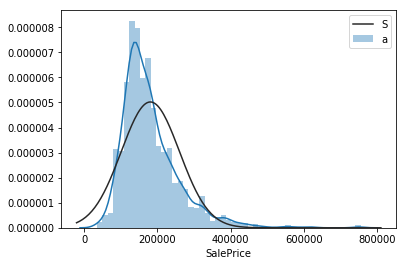

In [18]:
#Check Label distribution
sns.distplot(df_train['SalePrice'],fit=norm)
plt.legend('Sale Distribution')

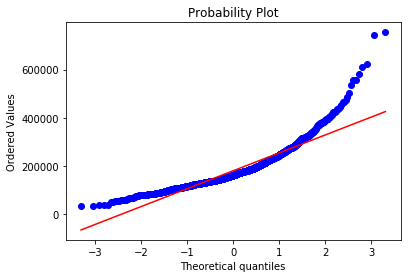

In [19]:
#Check linearity of Sale Price
fig = plt.figure()
r = stats.probplot(df_train['SalePrice'],plot=plt)
plt.show()

Distribution is skewed right and not linear. 

To fix such issues log transfarmation will come handy. Lets go ahead and apply

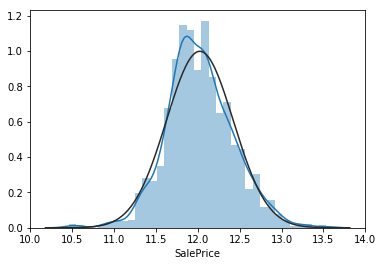

In [20]:
#log transfarmation to distribution
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'],fit=norm)

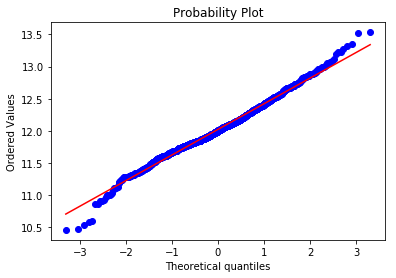

In [21]:
#log transfarmation to probabilty plot
fig = plt.figure()
r = stats.probplot(df_train['SalePrice'],plot=plt)
#plt.set_xlabel('SalePrice')
plt.show()

Post Log transfarmation graph looks good.

# Handling NaN's (Missing Data)

In [22]:
# Checking missing data in Train data. 
# 1. If we see huge data is missing in any feature in the train data, its better to drop those columns
# 2. Same features also need to drop from test data as well.

# Note : I have merged test data in the train data. 

So now onwards df_train will have both train and test data. I was trying different but did not work, so have to merge with train data.

In [23]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values

In [24]:
#merge files for Data processing and split before modelling
df_train = pd.concat((df_train,df_test)).reset_index(drop=True)
df_train.drop(['SalePrice'],axis=1,inplace=True)

In [25]:
train_null = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1]

for feature in train_null:
    null_sum = df_train[feature].isnull().sum()
    null_m   = df_train[feature].isnull().mean()
    print ('{}: has {} missing values and it is {} %'.format(feature, null_sum,np.round(null_m,6)*100))
    if np.round(null_m,2)*100 > 80:
        print ('Eligible to drop the feature ====================================> ', feature)

Alley: has 2719 missing values and it is 93.2122 %
Eligible to drop the feature ====================================>  Alley
BsmtCond: has 82 missing values and it is 2.8111 %
BsmtExposure: has 82 missing values and it is 2.8111 %
BsmtFinType1: has 79 missing values and it is 2.7083 %
BsmtFinType2: has 80 missing values and it is 2.7425 %
BsmtFullBath: has 2 missing values and it is 0.0686 %
BsmtHalfBath: has 2 missing values and it is 0.0686 %
BsmtQual: has 81 missing values and it is 2.7768 %
Fence: has 2346 missing values and it is 80.4251 %
FireplaceQu: has 1420 missing values and it is 48.6802 %
Functional: has 2 missing values and it is 0.0686 %
GarageCond: has 159 missing values and it is 5.4508 %
GarageFinish: has 159 missing values and it is 5.4508 %
GarageQual: has 159 missing values and it is 5.4508 %
GarageType: has 157 missing values and it is 5.3822 %
GarageYrBlt: has 159 missing values and it is 5.4508 %
LotFrontage: has 486 missing values and it is 16.661 %
MSZoning: ha

In [26]:
#Dropping features that have more than 80% missing values. It doesn't make sense to fill those values
# ELigible to drop the features are extended their hands in the above output
df_train= df_train.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [27]:
#verify the shape
df_train.shape

(2917, 75)

Fill remaining NaN's

# Dataset Backup

In [28]:
#Before filling any values lets take backup of our dataset. Just in case if we mess up anything in the further steps.
#We can start here instead of rerunning entire kernel which is time consuming (especially when dealing with big datasets)
df_train_bkp = df_train.copy()

In [29]:
#Fill nan with best possible data based on your judgment
# LotFrontage = Lets assume that,it will be same as its neighbor size. So ffill/bfill is is the best fit 

# Before fillna 
df_train.loc[6:8,'LotFrontage']

6   75.000
7      nan
8   51.000
Name: LotFrontage, dtype: float64

In [30]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(method='ffill',axis=0)

In [31]:
#Post fillna
df_train.loc[6:8,'LotFrontage']

6   75.000
7   75.000
8   51.000
Name: LotFrontage, dtype: float64

In [32]:
#Fill other features with best possible value. Filling with mode is good option it seems
cols = ['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for feature in cols:
    df_train[feature]=df_train[feature].fillna(df_train[feature].mode()[0])

In [33]:
#Fill na for Electrical (leftover)
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [34]:
# Verify if any nan's left
null_check = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1]
print ('Missing values', null_check)



Missing values ['BsmtFullBath', 'BsmtHalfBath', 'Functional', 'MSZoning', 'Utilities']


Label Encoding for categorical features

In [35]:
# Before encoding we need to make sure all the data types are string.
# If any of them are in other data types,convert them into string

df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [36]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

In [37]:
#Label Encoding for the above categorical columns
for cols in cat_cols:
    lbl = LabelEncoder()
    lbl.fit(list(df_train[cols].values))
    df_train[cols] = lbl.transform(list(df_train[cols].values))

In [38]:
#shape of data set
print ('Shape of dataset {}'.format(df_train.shape))

Shape of dataset (2917, 75)


In [39]:
# Total sq.feet of the house
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF']+df_train['2ndFlrSF']


In [40]:
#Skewed numerical Features
from scipy.stats import skew
num_feature = df_train.dtypes[df_train.dtypes != 'O'].index

skewd_feature = df_train[num_feature].apply(lambda x : skew(x.dropna())).sort_values(ascending=False )
print ("Skew in numerical features:")
skewness = pd.DataFrame({'skewd':skewd_feature })
skewness.head(15)

Skew in numerical features:


,skewd
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.144
EnclosedPorch,4.002
ScreenPorch,3.945


In [41]:
#Apply Box-Cox transfarmation to skewed features to reduce the same
skewness = skewness[abs(skewness) > 0.75]
print ('Total num skewness features are {}'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skew_feature = skewness.index
lam=.15
for feature in skew_feature:
    df_train[feature] = boxcox1p(df_train[feature],lam)


Total num skewness features are 56


In [42]:
#Get dummies for categorical features -
df_train = pd.get_dummies(df_train)
df_train.shape

(2917, 213)

In [43]:
train = df_train[:ntrain]
test = df_train[ntrain:]

# Modelling

In [44]:
#import all necessary libraries
from sklearn.linear_model import ElasticNet,Lasso,BayesianRidge,LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [45]:
#Validation
n_folds = 5

def rmsele_cv(model):
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_error(model,train.values,y_train,scoring='neg_mean_sqr_error',cv=kf))
    return(rmse)

In [46]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [48]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [49]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07888309303283453


In [52]:
model_lgb=lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05,n_estimator=720,max_bin=55,bagging_fraction=0.8,
                          bagging_freq=5,feature_fraction=0.2319,featuer_fraction_seed=9,bagging_seed=9,mini_data_in_leaf=6,min_sum_hessian_in_leaf=11)


In [53]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.11981994080150418
